(20001, 784)
(20001, 8)
(2001, 784)
(2001, 8)
(2001, 784)
(2001, 8)
[0. 1. 0. 0. 0. 0. 0. 0.]


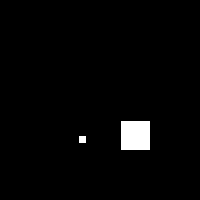

[0. 0. 1. 0. 0. 0. 0. 0.]


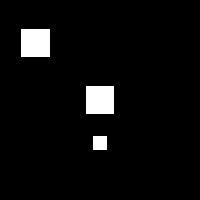

[0. 0. 0. 1. 0. 0. 0. 0.]


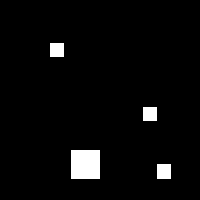

[0. 0. 0. 0. 0. 0. 1. 0.]


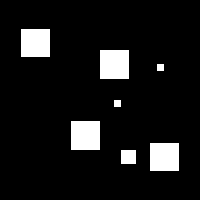

[0. 0. 0. 0. 0. 1. 0. 0.]


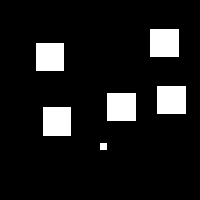

In [1]:
###################################
## CREATE IMAGES WITH RANDOMLY 
##  POSITIONED SQUARES WITH VARIED SIZE
#################################
# Good source about pixel manipulation: http://pythoninformer.com/python-libraries/numpy/numpy-and-images/

import numpy as np
import scipy.misc as smp
import random
from PIL import Image
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:500% !important;height:500% !important;}</style>"


max_objects = 8
img_size = 28



###################################
## Function that creates N (= argument of the function) Squares
##  randomly positioned with varying size
##  AND corresponding one-hot-encoded number of objects .
########
def Create_N_Sqaures(n_objects):

    
    n_neighbours_mean = 2
    data = np.zeros((img_size, img_size), dtype=np.uint8)
    obj_size_var = 2


    for n in range(n_objects):
        breaky = 0
        max_put_try = 1000    #Number of attempts to place square correctly: without overlap, within the borders of the image.
        put_try=0
        current_obj_size_var =  random.randint(0,obj_size_var)
        n_neighbours = n_neighbours_mean - current_obj_size_var

        # Now try to put square correctly into image for max_put_try.
        # Strategy: choose random x and y coordinate as center of the square: draw n_neighbours around center in each direction
        while (breaky == 0):
            rand_pixel_1 = random.randint(0,img_size-1)
            rand_pixel_2 = random.randint(0, img_size-1)
            dist_to_squ = 2
            # Check if object within borders
            if (rand_pixel_1 + n_neighbours <= img_size - dist_to_squ and rand_pixel_2 + n_neighbours <= img_size - dist_to_squ and rand_pixel_1 - n_neighbours > 0 + dist_to_squ and rand_pixel_2 - n_neighbours > 0 + dist_to_squ):
                breaky=1
                # Check if any objects are overlapping
                for i in range(2 * n_neighbours + 2*(dist_to_squ) ):
                    for j in range(2 * n_neighbours + 2*(dist_to_squ) ):
                      #if (rand_pixel_1 - n_neighbours -1  + i <= img_size - 3 and rand_pixel_2 - n_neighbours - 1 + j and rand_pixel_1 - n_neighbours -1  + i > 0 + 3 and rand_pixel_2 - n_neighbours - 1 + j > 0 + 3):
                      if(data[rand_pixel_1 - n_neighbours - dist_to_squ  + i, rand_pixel_2 - n_neighbours -dist_to_squ  + j] == 255):
                          breaky=0
            put_try += 1
            if(put_try >= max_put_try):
                breaky = 1
                print("ATTENTION: OBJECTS COULD NOT FIT INTO WINDOW. CHOOSE DIFFERENT SIZE FOR WINDOW OR OBJECTS")
                exit()
        data[rand_pixel_1,rand_pixel_2] = 255

        for i in range(2*n_neighbours):
            for j in range(2 * n_neighbours ):
                data[rand_pixel_1 - n_neighbours + i, rand_pixel_2 - n_neighbours + j] = 255


    

    # Data 2D-image --> 1D-array ( for NN as Input )
    data_flatten = data.flatten()
    # Build one-hot array from number of objects
    n_obj_one_hot = np.zeros(max_objects)
    n_objects_m_1 = n_objects-1
    n_obj_one_hot[n_objects_m_1] = 1

    return data_flatten, n_obj_one_hot




###################################
## Function that creates N images with set of squares
##   AND corresponding one-hot-encoded number of objects.
######
def Create_N_Images(n_images, only_one_number=False, n_squares=5):

    n_objects = random.randint(1, max_objects)
    if (only_one_number):
        n_objects = n_squares

    mult_img, mult_class = Create_N_Sqaures(n_objects)
    for i in range(n_images):
        n_objects = random.randint(1, max_objects)
        if (only_one_number):
            n_objects = n_squares

        data_flatten, n_obj_one_hot = Create_N_Sqaures(n_objects)
        mult_img = np.vstack([mult_img, data_flatten])
        mult_class = np.vstack((mult_class, n_obj_one_hot))

    return mult_img, mult_class




# Prepare Training data
mult_img, mult_class = Create_N_Images(20000)  # original 20000!!!!!
#np.save('Object_Sets_Array/trX', mult_img)
#np.save('Object_Sets_Array/trY', mult_class)
print(mult_img.shape)
print(mult_class.shape)

# Prepare Test data
mult_img_T, mult_class_T = Create_N_Images(2000)
#np.save('Object_Sets_Array/trX', mult_img_T)
#np.save('Object_Sets_Array/trY', mult_class_T)
print(mult_img_T.shape)
print(mult_class_T.shape)

#recovered_file = np.load('Object_Sets_Array/trX.npy')
print(mult_img_T.shape)
print(mult_class_T.shape)


########
## SHOW EXAMPLE PICS
###############
print(mult_class[0,:])
#get_ipython().__class__.__name__ = "ZMQInteractiveShell"
#print(get_ipython().__class__.__name__ == "ZMQInteractiveShell")
img = Image.fromarray(np.reshape(mult_img[0,:], (img_size,img_size)))  # Create a PIL image
img = img.resize((200,200))
display(img)
img.show()  # View in default viewer

print(mult_class[1,:])
img = Image.fromarray(np.reshape(mult_img[1,:], (img_size,img_size)))  # Create a PIL image
img = img.resize((200,200))
display(img)
img.show()  # View in default viewer

print(mult_class[2,:])
img = Image.fromarray(np.reshape(mult_img[2,:], (img_size,img_size)))  # Create a PIL image
img.show()  # View in default viewer
img = img.resize((200,200))
display(img)

print(mult_class[3,:])
img = Image.fromarray(np.reshape(mult_img[3,:], (img_size,img_size)))  # Create a PIL image
img.show()  # View in default viewer
img = img.resize((200,200))
display(img)

print(mult_class[4,:])
img = Image.fromarray(np.reshape(mult_img[4,:], (img_size,img_size)))  # Create a PIL image
img.show()  # View in default viewer
img = img.resize((200,200))
display(img)








In [0]:
#########################
## You can also upload files from your local drive 
## (for the case you it takes a lot of time to create the data and you do not want to create them in each runtime session again)
###############################################

from google.colab import files
uploaded = files.upload()
!pwd

import numpy as np
##### the file names in np.load (...) should be the same as it says in the output after you uploaded them: e.g. "Saving teX.npy to ....." --- ... is how you can access the data now
trX = np.load('trX (3).npy')
trY = np.load('trY (3).npy')
teX = np.load('teX (3).npy')
teY = np.load('teY (3).npy')

print(trY[0])
print(teY[0])


/content


FileNotFoundError: ignored

In [4]:
##############################
## Create a directory 'logs' to save the results
###################################

import os
# Where to run code?: /content/logs
!pwd
!ls
!mkdir logs
os.chdir('/content/logs')
!ls

os.system('fuser 6006/tcp -k')
os.chdir('/content/')

############################### 
## or remove all logs you have done so far
################################
#!rm -rf *


/content
sample_data


In [6]:
######################
## This is required to run tensorboard on Google Colab - Jupyter Notebook: 
##  This will create a link ending with ... .ngrok.io which you can open to get to tensorboard
#####################################


!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = '/content/logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
#--debugger_port 6064

get_ipython().system_raw('/content/ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-05-20 19:18:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.4.75.11, 52.203.102.189, 52.204.136.9, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.4.75.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  15.88M  8.60MB/s    in 1.8s    

2019-05-20 19:18:51 (8.60 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://2307e3e2.ngrok.io


(20001, 784)
(20001, 8)
(2001, 784)
(2001, 8)
0 0.21139431
1 0.35182407
2 0.4627686
3 0.5087456
4 0.62968516
5 0.6956522
6 0.6621689
7 0.75762117
8 0.8115942
9 0.8135932
10 0.81509244
11 0.8725637
12 0.87356323
13 0.878061
14 0.9115442
15 0.7916042
16 0.86856574
17 0.8325837
18 0.7856072
19 0.936032
20 0.8350825
21 0.93853074
22 0.948026
23 0.9490255
24 0.9545227
25 0.92703646
26 0.95002496
27 0.894053
28 0.9545227
29 0.93253374
30 0.9585207
31 0.95052475
32 0.9610195
33 0.9585207
34 0.96251875
35 0.96201897
36 0.9170415
37 0.92253876
38 0.9645177
39 0.9610195
40 0.96851575
41 0.96251875
42 0.90904546
43 0.922039
44 0.96651673
45 0.95752126
46 0.96951526
47 0.96351826
48 0.972014
49 0.87306345
50 0.974013
51 0.97451276
52 0.976012
53 0.9715142
54 0.9630185
55 0.974013
56 0.9650175
57 0.970015
58 0.97451276
59 0.97351325
60 0.83208394
61 0.978011
62 0.9705147
63 0.970015
64 0.9690155
65 0.97251374
66 0.96951526
67 0.96651673
68 0.96951526
69 0.974013
70 0.97551227
71 0.9765117
72 0.9730

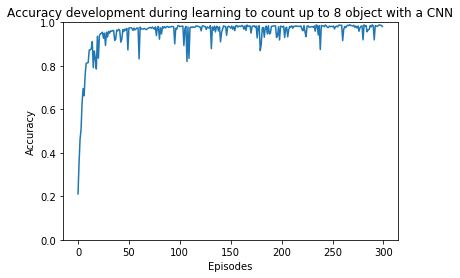

In [7]:

import tensorflow as tf
tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.misc as smp
import os
from tensorflow.python import debug as tf_debug
#from fs.osfs import OSFS
import datetime
now = datetime.datetime.now()
from tensorflow.contrib.tensorboard.plugins import projector



################################
## AUXILIARY FUNCTIONS
################################
def array_to_image(data):
    img = smp.toimage(np.reshape(data, (img_size,img_size)))
    return  img

def init_weights(shape, name):
    return tf.Variable(tf.random_normal(shape, stddev=0.01), name=name)
  
def conv_to_tensorboard(conv_layer, conv_name, scope_name ):
    with tf.variable_scope(scope_name):
        kernel_str = conv_name + '/kernel'
        kernel = tf.get_collection(tf.GraphKeys.VARIABLES, kernel_str)[0]
         # scale weights to [0 1], type is still float
        x_min = tf.reduce_min(kernel)
        x_max = tf.reduce_max(kernel)
        kernel_0_to_1 = (kernel - x_min) / (x_max - x_min)
        # to tf.image_summary format [batch_size, height, width, channels]
        kernel_transposed = tf.transpose (kernel_0_to_1, [3, 0, 1, 2])
        # this will display random 3 filters from the 64 in conv1
        tf.summary.image('conv1_filters', kernel_transposed,max_outputs=32)
        
def layer_and_input_activ_to_tensorboard(layer, inputt, input_id, scope_name, img_w, img_h):
    with tf.name_scope("Sizes"):
      layer_shape = layer.get_shape().as_list()
      widthy = layer.get_shape().as_list()[1]
      whole_layer = layer
    imgy = tf.reshape(layer, [-1, img_w, img_h, 1])    
    imgy2 = tf.reshape(inputt, [-1, img_size, img_size, 1])
    input_str = 'Input_' + input_id
    layer_str = scope_name + '_of_' + input_str
    tf.summary.image(input_id, imgy)
    tf.summary.image(input_id, imgy2)

    
################################
## NN - Models
################################
# This network is the same as the previous one except with an extra hidden layer + dropout

def fully_connected_net(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden,is_trainy):
    # Add layer name scopes for better graph visualization
    with tf.name_scope("layer1"):
        X = tf.nn.dropout(X, p_keep_input)
        h = tf.nn.relu(tf.matmul(X, w_h))
    with tf.name_scope("layer2"):
        h = tf.nn.dropout(h, p_keep_hidden)
        h2 = tf.nn.relu(tf.matmul(h, w_h2))
    with tf.name_scope("layer3"):
        h2 = tf.nn.dropout(h2, p_keep_hidden)
        h3 = tf.nn.relu(tf.matmul(h2, w_h3))
    with tf.name_scope("layer4"):
        h3 = tf.nn.dropout(h3, p_keep_hidden)
        h4 = tf.nn.relu(tf.matmul(h3, w_h4))
    with tf.name_scope("layer5"):
        h4 = tf.nn.dropout(h4, p_keep_hidden)
        h5 = tf.nn.relu(tf.matmul(h4, w_h5))
    with tf.name_scope("layer5"):
        h5 = tf.nn.dropout(h5, p_keep_hidden)
        return tf.matmul(h5, w_o)



def conv_net(x_arr, n_classes, dropout, is_training, reuse):
    # data input might come as a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x_arr, shape=[-1, img_size, img_size, 1])

    # Convolution Layer with 32 filters and a kernel size of 5
    with tf.name_scope("conv1"):
      #kernel = _variable_with_weight_decay('weights', shape=[5, 5, 3, 64],
       #                                stddev=1e-4, wd=0.0)
      #conv = tf.nn.conv2d(images, kernel, [1, 1, 1, 1], padding='SAME')
      #conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
      conv1 = tf.layers.conv2d(inputs=x,filters=8,kernel_size=[5, 5],padding="same",activation=tf.nn.relu, name='conv1')
      # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
      conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

    # Convolution Layer with 64 filters and a kernel size of 3
    with tf.name_scope("conv2"):
      conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
      # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
      conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

    # Flatten the data to a 1-D vector for the fully connected layer
    conv2_flatten = tf.contrib.layers.flatten(conv2)
    # Fully connected layer (in tf contrib folder for now)
    fc1 = tf.layers.dense(conv2_flatten, 9)   #original 1024
    # Apply Dropout (if is_training is False, dropout is not applied)
    fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)
    
    # Output layer, class prediction
    out = tf.layers.dense(fc1, n_classes)
    
    ######################
    #### PLOT LAYERS IN TENSORBOARD
    ######################
    conv_to_tensorboard(conv1, 'conv1', 'Conv1_Kernel_visualization' ) 
    
    layer_shape = fc1[0].get_shape()
    widthy = fc1.get_shape().as_list()[1]
    whole_layer = fc1
    
    with tf.variable_scope('Last_layer_activation'):
      for obj in range(5):   
        layer_and_input_activ_to_tensorboard(fc1[obj:obj+1], x[obj:obj+1], str(obj), 'Last_layer_activation',3,3)
       
    with tf.variable_scope('conv1'):
      for obj in range(5):   
        layer_and_input_activ_to_tensorboard(conv1[obj:obj+1], x[obj:obj+1], str(obj), 'conv1_activation',img_size,img_size)  
    
      

       
    return out, fc1

  

################################
## LOAD DATA
################################

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

## If you have uploaded files above:
#trX = np.load('trX.npy')
#trY = np.load('trY.npy')
#teX = np.load('teX.npy')
#teY = np.load('teY.npy')

# If you have created the files within this notebook:
trX = mult_img
trY = mult_class
teX = mult_img_T
teY = mult_class_T

print(trX.shape)
print(trY.shape)
print(teX.shape)
print(teY.shape)



##########################################
## CREATE QUANTITIES/PLACEHOLDERS and SET THEM INTO NN
#########################################

#Step 2 - Create input and output placeholders for data
X = tf.placeholder("float", [None, trX[0,:].size], name="X")
Y = tf.placeholder("float", [None, trY[0,:].size], name="Y")
is_training = tf.placeholder(tf.bool)
failed_object = tf.placeholder(tf.int32, name="FAILY")
failed_object_string = tf.placeholder(dtype=tf.string)

#Step 3 - Initialize weights
'''
n_h_neurons = 100    #original 625
w_h = init_weights([trX[0,:].size, n_h_neurons], "w_h")
w_h2 = init_weights([n_h_neurons, n_h_neurons], "w_h2")
w_h3 = init_weights([n_h_neurons, n_h_neurons], "w_h2")
w_h4 = init_weights([n_h_neurons, n_h_neurons], "w_h2")
w_h5 = init_weights([n_h_neurons, n_h_neurons], "w_h2")
w_o = init_weights([n_h_neurons, trY[0,:].size], "w_o")

#Step 4 - Add histogram summaries for weights
tf.summary.histogram("w_h_summ", w_h)
tf.summary.histogram("w_h2_summ", w_h2)
tf.summary.histogram("w_o_summ", w_o)
'''

#Step 5 - Add dropout to input and hidden layers
p_keep_input = tf.placeholder("float", name="p_keep_input")
p_keep_hidden = tf.placeholder("float", name="p_keep_hidden")



#Step 6 - Create Model
#py_x = fully_connected_net(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden)
py_x, fc1 = conv_net(X, trY[0,:].size, 0.25, is_training, reuse=False)




##########################################
## COST + TRAIN_STEP
#########################################
#Step 7 Create cost function
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x,labels= Y))
    train_op = tf.train.RMSPropOptimizer(0.0005, 0.7).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

#Step 8 Measure accuracy
with tf.name_scope("accuracy"):
    correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(py_x, 1)) # Count correct predictions
    acc_op = tf.reduce_mean(tf.cast(correct_pred, "float")) # Cast boolean to float to average
    # Add scalar summary for accuracy tensor
    tf.summary.scalar("accuracy", acc_op)
   
  
  
##########################################
## PLOT INCORRECT PREDICTIONS
#########################################
with tf.variable_scope('Failed_test_examples'):
  incorrect_pred = tf.not_equal(tf.argmax(Y, 1), tf.argmax(py_x, 1))
  indices = tf.where(incorrect_pred)
  x_arr = tf.reshape(X, shape=[-1, img_size, img_size, 1])
  x_arr_reduced = tf.gather_nd(x_arr, indices)
  imgy2 = tf.reshape(x_arr_reduced, [-1, img_size, img_size, 1])  
  to_tensi = tf.summary.image('Test', imgy2 ,max_outputs=5)
  

  
  
  
    
###############
##########################################
## SESSION / ACTUAL RUN
#########################################
###############
#Step 9 Create a session
acc_arr = []
episodes = []
n_episodes = 300

with tf.Session() as sess:
    #sess = tf_debug.TensorBoardDebugWrapperSession(sess, "localhost:6064")
    

    # Define directory name to log on.
    fily = str(now.year) + '_' + str(now.month) + '_' + str(now.day) + '_' + str(now.hour) + 'h_' + str(now.minute)
    fily = './logs/' + fily
    #test_writer = tf.train.SummaryWriter(this_test)
    writer = tf.summary.FileWriter(fily, sess.graph) # for 0.8
    merged = tf.summary.merge_all()

    # Step 11 you need to initialize all variables
    tf.initialize_all_variables().run()
    #file_name = os.path.join(dirname, 'logs/events.out.tfevents.1539591730.NTNU15406')
    saver = tf.train.Saver()
    #saver.restore(sess, tf.train.latest_checkpoint(file_name))      ## if you want to get e.g. weights from a last session you can do it here!!!!!!!!

    #Step 12 train the  model
    for i in range(n_episodes):
        #if(i==0):
            #saver.restore(sess, './logs/Last_model')
        n_batch = 60
        batch_bool = 0
        if(batch_bool==0):
            for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
                sess.run(train_op,                    feed_dict={X: trX[start:end].astype(np.float32), Y: trY[start:end].astype(np.float32),p_keep_input: 0.8, p_keep_hidden: 0.5, is_training: True})
        else:
            for b in range(int(trX[0,:].size/n_batch)):
                batch_xs = trX[b*n_batch:b*n_batch+n_batch]
                batch_ys = trY[b*n_batch:b*n_batch+n_batch]
                sess.run(train_op, feed_dict={X: batch_xs, Y: batch_ys, p_keep_input: 0.8, p_keep_hidden: 0.5,is_training: True})

        indi, summary, acc = sess.run([indices, merged, acc_op], feed_dict={X: teX.astype(np.float32), Y: teY.astype(np.float32),p_keep_input: 1.0, p_keep_hidden: 1.0,is_training: False, failed_object: 0,failed_object_string: "0"})


        writer.add_summary(summary, i)  # Write summary
        print(i, acc)                   # Report the accuracy
        acc_arr = np.append(acc_arr,acc)
        episodes = np.append(episodes, i)
        
        
        
        
        
       
    
    
  
  
 
        
#######################
## PLOT ACCURACY CURVE
######################

matplotlib.get_backend()
plt.plot(np.arange(0,n_episodes), acc_arr)
plt.ylabel('Accuracy')
plt.xlabel('Episodes')
plt.ylim(0,1)
titlestring = 'Accuracy development during learning to count up to ' + str(trY[0].size) + ' object with a CNN'
plt.title(titlestring)
plt.savefig('Standard_NN.png')
#plt.plot([1,2,3], [1,1,1])
plt.show()


In [0]:







#######################################
## TRASH, meanwhile
########################################


# Initialize the embedding variable with the shape of our desired tensor
tensor_shape = (trX.shape[0] , fc1.get_shape()[1].value) # [test_set , h1] = [10000 , 200]
embedding_var = tf.Variable(tf.zeros(tensor_shape), 
                            name='fc1_embedding')
# assign the tensor that we want to visualize to the embedding variable
embedding_assign = embedding_var.assign(fc1) 

from tensorflow.contrib.tensorboard.plugins import projector

# Create a config object to write the configuration parameters
config = projector.ProjectorConfig()

# Add embedding variable
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# Link this tensor to its metadata file (e.g. labels) -> we will create this file later
embedding.metadata_path = 'metadata.tsv'

# Specify where you find the sprite. -> we will create this image later
embedding.sprite.image_path = 'sprite_images.png'
embedding.sprite.single_image_dim.extend([img_w, img_h])

# Write a projector_config.pbtxt in the logs_path.
# TensorBoard will read this file during startup.
projector.visualize_embeddings(train_writer, config)







# Run session to evaluate the tensor
x_test_fc1 = sess.run(embedding_assign, feed_dict={x: x_test})

# Save the tensor in model.ckpt file
saver = tf.train.Saver()
saver.save(sess, os.path.join(logs_path, "model.ckpt"), global_step)



 '''
        #################################################################################
        # Load the test set
        x_test = teX
        y_test = teY

        fc1 = sess.run(fc1, feed_dict={X: teX.astype(np.float32), Y: teY.astype(np.float32),p_keep_input: 1.0, p_keep_hidden: 1.0,is_training: False, failed_object: 0,failed_object_string: "0"})

        # Initialize the embedding variable with the shape of our desired tensor
        tensor_shape = (x_test.shape[0] , fc1.shape[1]) # [test_set , h1] = [10000 , 200]
        embedding_var = tf.Variable(tf.zeros(tensor_shape), 
                                    name='fc1_embedding')
        # assign the tensor that we want to visualize to the embedding variable
        embedding_assign = embedding_var.assign(fc1) 



        

        # Create a config object to write the configuration parameters
        config = projector.ProjectorConfig()

        # Add embedding variable
        embedding = config.embeddings.add()
        embedding.tensor_name = embedding_var.name

        # Link this tensor to its metadata file (e.g. labels) -> we will create this file later
        embedding.metadata_path = 'metadata.tsv'

        # Specify where you find the sprite. -> we will create this image later
        embedding.sprite.image_path = 'sprite_images.png'
        embedding.sprite.single_image_dim.extend(trX[0].shape)   #[img_w, img_h]

        # Write a projector_config.pbtxt in the logs_path.
        # TensorBoard will read this file during startup.
        projector.visualize_embeddings(writer, config)



          
        
         # Run session to evaluate the tensor
        x_test_fc1 = sess.run(embedding_assign, feed_dict={x: x_test})

        # Save the tensor in model.ckpt file
        saver = tf.train.Saver()
        saver.save(sess, os.path.join(logs_path, "model.ckpt"), global_step)





        def write_sprite_image(filename, images):
          """
              Create a sprite image consisting of sample images
              :param filename: name of the file to save on disk
              :param shape: tensor of flattened images
          """

          # Invert grayscale image
          images = 1 - images

          # Calculate number of plot
          n_plots = int(np.ceil(np.sqrt(images.shape[0])))

          # Make the background of sprite image
          sprite_image = np.ones((img_h * n_plots, img_w * n_plots))

          for i in range(n_plots):
              for j in range(n_plots):
                  img_idx = i * n_plots + j
                  if img_idx < images.shape[0]:
                      img = images[img_idx]
                      sprite_image[i * img_h:(i + 1) * img_h,
                      j * img_w:(j + 1) * img_w] = img

          plt.imsave(filename, sprite_image, cmap='gray')
          print('Sprite image saved in {}'.format(filename))

        def write_metadata(filename, labels):
            """
                    Create a metadata file image consisting of sample indices and labels
                    :param filename: name of the file to save on disk
                    :param shape: tensor of labels
            """
            with open(filename, 'w') as f:
                f.write("Index\tLabel\n")
                for index, label in enumerate(labels):
                    f.write("{}\t{}\n".format(index, label))

            print('Metadata file saved in {}'.format(filename))







        # Reshape images from vector to matrix
        x_test_images = np.reshape(np.array(x_test), (-1, img_w, img_h))
        # Reshape labels from one-hot-encode to index
        x_test_labels = np.argmax(y_test, axis=1)

        write_sprite_image(os.path.join(logs_path, 'sprite_images.png'), x_test_images)
        write_metadata(os.path.join(logs_path, 'metadata.tsv'), x_test_labels)
    
    
        '''    
    
    
    
    
    